# Deep Learning for Business Applications course

## TOPIC 7: Face Recognition with DeepFace

### 1. Library installation

[DeepFace](https://github.com/serengil/deepface?tab=readme-ov-filehttps://github.com/serengil/deepface?tab=readme-ov-file) is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

In [1]:
!pip install deepface
!pip install opencv-python

  Using cached deepface-0.0.93-py3-none-any.whl.metadata (30 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached Flask_Cors-5.0.0-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached mtcnn-1.0.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Using cached deepface-0.0.93-py3-none-any.whl (108 kB)
Using cached 

In [2]:
import os
import cv2
import requests
from PIL import Image
import numpy as np
from deepface import DeepFace
from matplotlib import pyplot as plt

2024-11-25 19:09:11.681186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 19:09:12.640825: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### 2. Embeddings

Let's use a [picture of a teacher](https://gsom.spbu.ru/about-gsom/faculty/garshin/) from GSOM site.

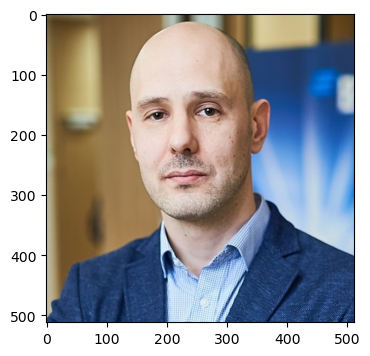

In [3]:
img_url = 'https://gsom.spbu.ru/images/1faces/garshin.jpg'
img = Image.open(
    requests.get(img_url, stream=True).raw
).convert('RGB')
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.show()

In [4]:
!mkdir -p db

In [6]:
img.save('db/vgarshin.jpg')

In [7]:
def dfproc(img_path, fsize=(6, 6), model_name='VGG-Face'):
    # load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('image loaded:', img_path)

    # plot an image loaded
    if fsize:
        plt.figure(figsize=fsize)
        plt.imshow(img)
        plt.show()

    # process with DeepFace
    embedding_objs = DeepFace.represent(
        img_path,
        model_name=model_name
    )

    # draw resuls
    for i, emb in enumerate(embedding_objs):
        # To draw a rectangle in a face
        face = emb['facial_area']
        x, y, w, h = face['x'], face['y'], face['w'], face['h']
        cv2.rectangle(
            img,
            (x, y),
            (x + w, y + h),
            (0, 255, 0),
            2
        )
        descr = f'face {i}, conf={emb["face_confidence"]}'
        cv2.putText(
            img,
            descr,
            (x, y),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.25,
            (0, 255, 0),
            3
        )
    if fsize:
        plt.figure(figsize=fsize)
        plt.imshow(img)
        plt.show()

    return embedding_objs

image loaded: db/vgarshin.jpg


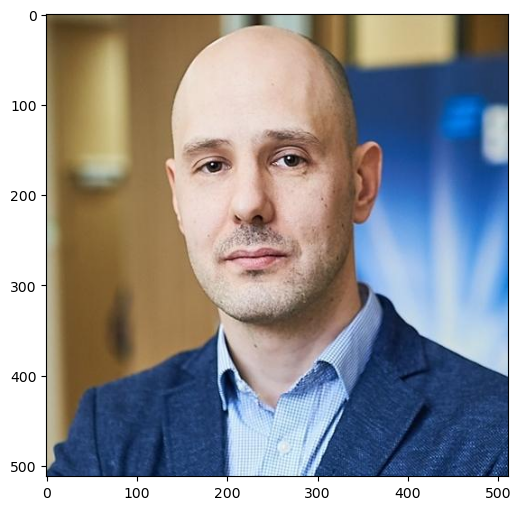

2024-11-25 19:10:02.765074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


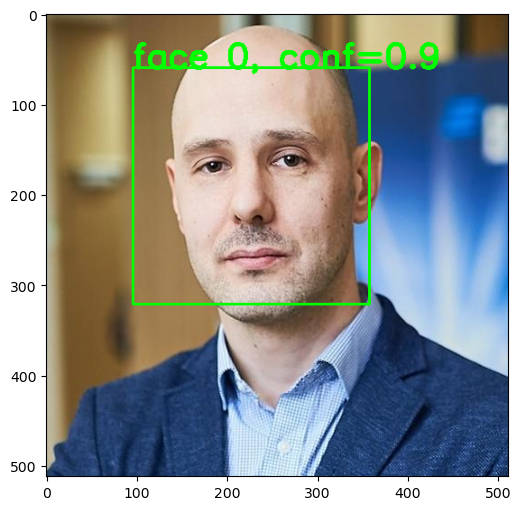

In [8]:
embedding_objs = dfproc(img_path='db/vgarshin.jpg')

image loaded: imgs/faces1.jpg


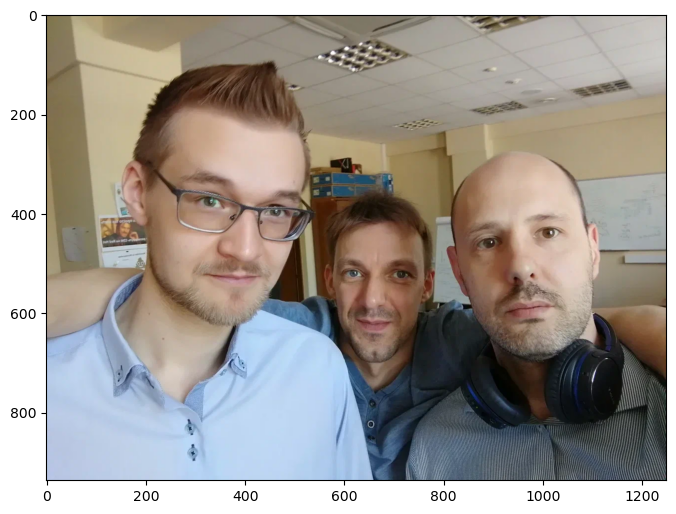

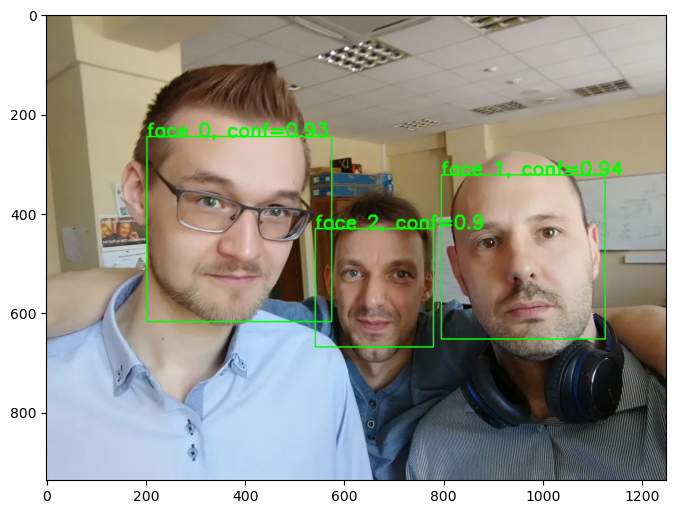

In [9]:
embedding_objs = dfproc(img_path='imgs/faces1.jpg', fsize=(8, 8))

In [10]:
len(embedding_objs)

3

In [11]:
embedding_objs[0].keys()

dict_keys(['embedding', 'facial_area', 'face_confidence'])

In [12]:
embedding_objs[0]['facial_area']

{'x': 203,
 'y': 246,
 'w': 372,
 'h': 372,
 'left_eye': (463, 397),
 'right_eye': (328, 376)}

In [13]:
embedding_objs[0]['face_confidence']

0.93

In [14]:
len(embedding_objs[0]['embedding'])

4096

### 3. Advanced analysis

In [15]:
def dfanalyze(img_path, fsize=(6, 6)):
    # load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('image loaded:', img_path)

    # plot an image loaded
    if fsize:
        plt.figure(figsize=fsize)
        plt.imshow(img)
        plt.show()

    # process with DeepFace
    results = DeepFace.analyze(img_path)

    # draw resuls
    for i, res in enumerate(results):
        # To draw a rectangle in a face
        face = res['region']
        x, y, w, h = face['x'], face['y'], face['w'], face['h']
        cv2.rectangle(
            img,
            (x, y),
            (x + w, y + h),
            (0, 255, 0),
            2
        )
        emo = max(res['gender'], key=res['gender'].get)
        descr = ', '.join([
            emo,
            res['dominant_emotion'],
            'age ' + str(res['age'])
        ])
        cv2.putText(
            img,
            descr,
            (x, y),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.25,
            (0, 255, 0),
            3
        )
    if fsize:
        plt.figure(figsize=fsize)
        plt.imshow(img)
        plt.show()

    return results

image loaded: db/vgarshin.jpg


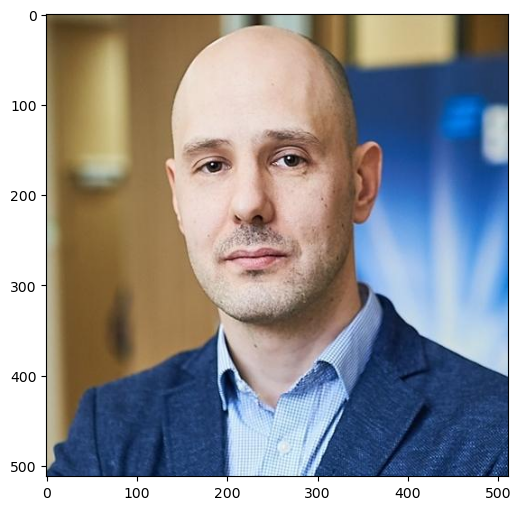

Action: race: 100%|██████████| 4/4 [00:49<00:00, 12.45s/it]   


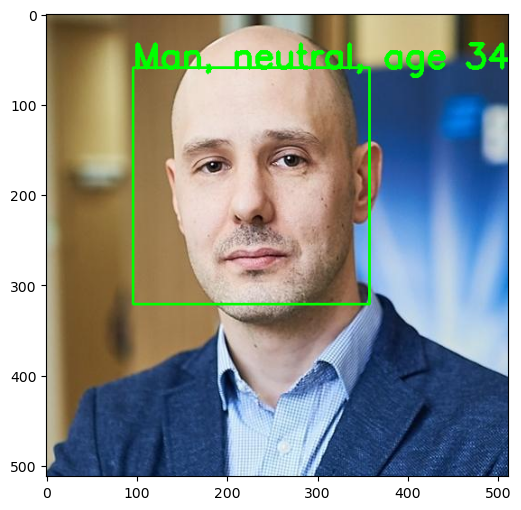

In [16]:
results = dfanalyze(img_path='db/vgarshin.jpg')

image loaded: imgs/faces1.jpg


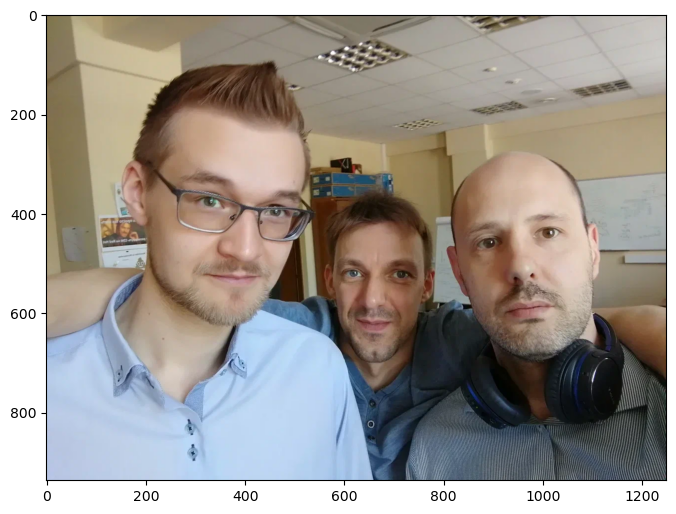

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]  


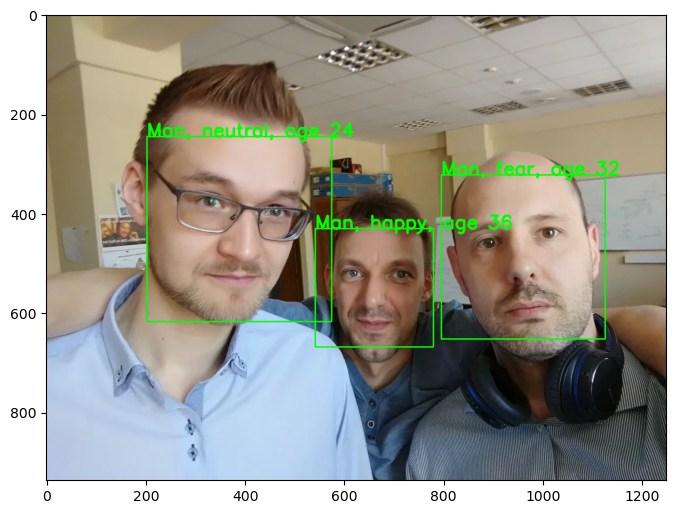

In [17]:
results = dfanalyze(img_path='imgs/faces1.jpg', fsize=(8, 8))

In [18]:
results[0]

{'emotion': {'angry': 27.29940116405487,
  'disgust': 4.2540909817034844e-05,
  'fear': 0.003145760274492204,
  'happy': 31.92419707775116,
  'sad': 1.930498518049717,
  'surprise': 0.0015327455912483856,
  'neutral': 38.8411819934845},
 'dominant_emotion': 'neutral',
 'region': {'x': 203,
  'y': 246,
  'w': 372,
  'h': 372,
  'left_eye': (463, 397),
  'right_eye': (328, 376)},
 'face_confidence': 0.93,
 'age': 24,
 'gender': {'Woman': 0.0015788296877872199, 'Man': 99.99842643737793},
 'dominant_gender': 'Man',
 'race': {'asian': 6.311179845397419e-05,
  'indian': 0.0005592369234364014,
  'black': 9.96867584035499e-06,
  'white': 98.97173643112183,
  'middle eastern': 0.670892046764493,
  'latino hispanic': 0.3567405743524432},
 'dominant_race': 'white'}

### 4. Face recognition

#### 4.1. Manual matching

In [19]:
MODELS = [
    'VGG-Face',
    'Facenet',
    'Facenet512',
    'OpenFace',
    'DeepFace',
    'DeepID',
    'ArcFace',
    'Dlib',
    'SFace',
    'GhostFaceNet'
]

In [20]:
def cosine_sim(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [21]:
emb_vgarshin = dfproc(
    img_path='db/vgarshin.jpg',
    fsize=None,
    model_name=MODELS[2]
)
emb_friends = dfproc(
    img_path='imgs/faces1.jpg',
    fsize=None,
    model_name=MODELS[2]
)

image loaded: db/vgarshin.jpg
image loaded: imgs/faces1.jpg


In [22]:
for i, emb in enumerate(emb_friends):
    cos_sim = cosine_sim(
        emb_vgarshin[0]['embedding'],
        emb['embedding']
    )
    print(f'vgarshin and face {i} =', cos_sim)

vgarshin and face 0 = 0.016596473885695222
vgarshin and face 1 = 0.68414405434625
vgarshin and face 2 = -0.005079266699124567


#### 4.2. Built-in tools

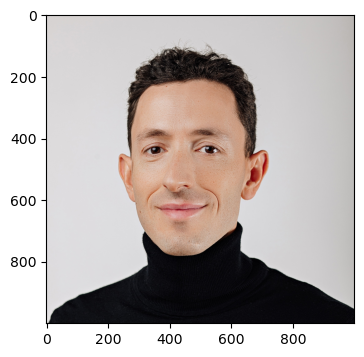

In [23]:
img_url = 'https://gsom.spbu.ru/images/1faces/gorovoi.jpg'
img = Image.open(
    requests.get(img_url, stream=True).raw
).convert('RGB')
img.save('db/vgorovoi.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.show()

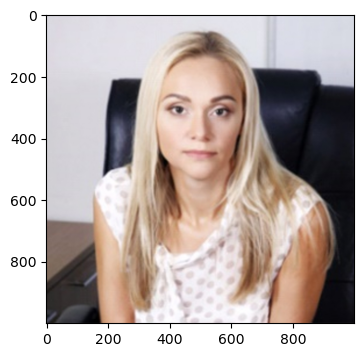

In [24]:
img_url = 'https://gsom.spbu.ru/images/1faces/bova.jpg'
img = Image.open(
    requests.get(img_url, stream=True).raw
).convert('RGB')
img.save('db/sbova.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.show()

In [25]:
# face verification

result = DeepFace.verify(
  img1_path='db/sbova.jpg',
  img2_path='db/vgarshin.jpg',
  model_name=MODELS[0]
)
print(result)

{'verified': False, 'distance': 0.9247167852493938, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 321, 'y': 173, 'w': 356, 'h': 356, 'left_eye': (570, 314), 'right_eye': (419, 304)}, 'img2': {'x': 96, 'y': 59, 'w': 262, 'h': 262, 'left_eye': (268, 162), 'right_eye': (183, 166)}}, 'time': 1.04}


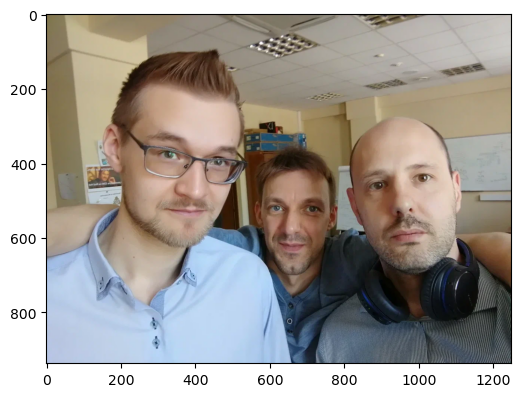

In [26]:
img_path = 'imgs/faces1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.show()

In [27]:
# take face 1 from friends image

emb_friends[1]['facial_area']

{'x': 796,
 'y': 323,
 'w': 330,
 'h': 330,
 'left_eye': (1010, 439),
 'right_eye': (890, 463)}

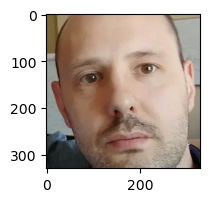

In [28]:
face = emb_friends[1]['facial_area']
x, y, w, h = face['x'], face['y'], face['w'], face['h']
img_vgarshin = img[y:y + h, x:x + w, :]
plt.figure(figsize=(2, 2))
plt.imshow(img_vgarshin)
plt.show()

In [29]:
# face verification

result = DeepFace.verify(
  img1_path=img_vgarshin,
  img2_path='db/vgarshin.jpg',
  model_name=MODELS[0]
)
print(result)

{'verified': True, 'distance': 0.44302652407355314, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 329, 'h': 329, 'left_eye': (213, 116), 'right_eye': (94, 140)}, 'img2': {'x': 96, 'y': 59, 'w': 262, 'h': 262, 'left_eye': (268, 162), 'right_eye': (183, 166)}}, 'time': 0.6}


In [30]:
# face recognition

results = DeepFace.find(
  img_path=img_vgarshin,  # face to find
  db_path='db',  # path to directory with faces
  model_name=MODELS[0]
)

24-11-25 19:29:06 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


24-11-25 19:29:08 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-25 19:29:08 - Searching [[[122 101  58]
  [122 101  58]
  [122 101  58]
  ...
  [177 164 132]
  [177 164 132]
  [177 164 132]]

 [[124 104  60]
  [124 104  60]
  [124 104  60]
  ...
  [176 163 131]
  [177 164 132]
  [177 164 132]]

 [[124 104  60]
  [124 104  60]
  [124 104  60]
  ...
  [176 163 131]
  [175 162 130]
  [175 162 130]]

 ...

 [[ 34  38  41]
  [ 34  38  41]
  [ 34  38  41]
  ...
  [ 17  15   9]
  [  9  10   5]
  [  1   3   2]]

 [[ 34  38  41]
  [ 34  38  41]
  [ 34  38  41]
  ...
  [ 20  19  13]
  [ 13  14   9]
  [  1   3   2]]

 [[ 35  39  42]
  [ 35  39  42]
  [ 35  39  42]
  ...
  [ 19  18  11]
  [ 16  17  12]
  [ 11  14  13]]] in 3 length datastore
24-11-25 19:29:08 - find function duration 1.9838240146636963 seconds


In [31]:
type(results)

list

In [32]:
len(results)

1

In [33]:
results[0]

identity                                      hash  target_x  \
0  db/vgarshin.jpg  7f5dd0370343fd1d95cc971b657258eb9427ab16        96   

   target_y  target_w  target_h  source_x  source_y  source_w  source_h  \
0        59       262       262         0         0       329       329   

   threshold  distance  
0       0.68  0.443027

In [34]:
!ls -la db/

total 292
drwxrwsr-x 2 jovyan users   4096 Oct 29 20:08 .
drwxrwsr-x 6 jovyan users   4096 Nov 25 19:28 ..
-rw-rw-r-- 1 jovyan users 110978 Nov 25 19:29 ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
-rw-rw-r-- 1 jovyan users  58747 Nov 25 19:26 sbova.jpg
-rw-rw-r-- 1 jovyan users  31151 Nov 25 19:09 vgarshin.jpg
-rw-rw-r-- 1 jovyan users  80524 Nov 25 19:23 vgorovoi.jpg


In [35]:
!rm -rf db/.ipynb_checkpoints

### 5. Clean up

In [ ]:
!ls -la ~/.deepface

In [ ]:
!rm -rf ~/.deepface/weights

### <font color='red'>HOME ASSIGNMENT (Option #1)</font>

Your goal is to make your own database of faces and test `DeepFace.verify()` and `DeepFace.find()` methods. You may use your own photos or photos of the celebrities (in a case you do not want use your face for home assignment).

Please collect at least 5 images for database.

In [36]:
# face verification

result = DeepFace.verify(
  img1_path='db_home/ann.jpeg',
  img2_path='db_home/kira.jpeg',
  model_name=MODELS[0]
)
print(result)


{'verified': False, 'distance': 0.8950757613494559, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 124, 'y': 287, 'w': 769, 'h': 769, 'left_eye': (650, 572), 'right_eye': (344, 589)}, 'img2': {'x': 333, 'y': 190, 'w': 456, 'h': 456, 'left_eye': (628, 354), 'right_eye': (554, 554)}}, 'time': 2.19}


In [37]:
# face verification

result = DeepFace.verify(
  img1_path='db_home/ann.jpeg',
  img2_path='db_home/natali.jpeg',
  model_name=MODELS[0]
)
print(result)

{'verified': False, 'distance': 0.8308510540827946, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 124, 'y': 287, 'w': 769, 'h': 769, 'left_eye': (650, 572), 'right_eye': (344, 589)}, 'img2': {'x': 71, 'y': 0, 'w': 168, 'h': 167, 'left_eye': (182, 46), 'right_eye': (125, 45)}}, 'time': 1.23}


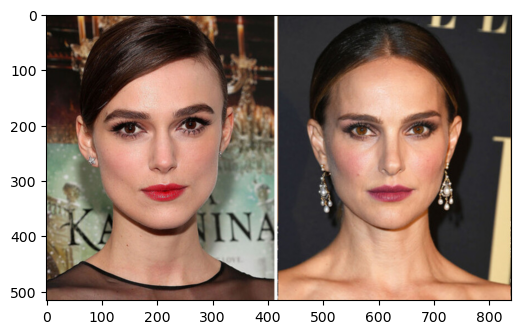

In [71]:
img_path = 'natali_kira.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.show()

image loaded: natali_kira.jpeg


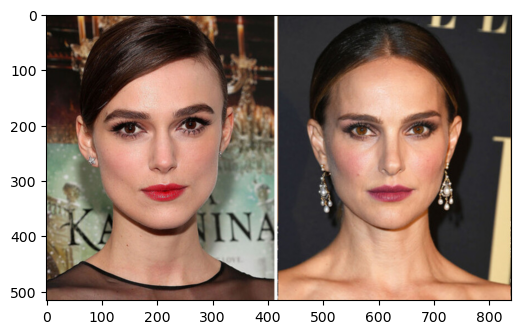

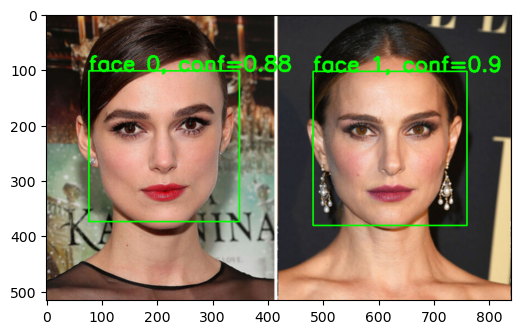

In [72]:
embedding_objs = dfproc(img_path=img_path)

In [73]:
embedding_objs[0]['facial_area']

{'x': 77,
 'y': 102,
 'w': 272,
 'h': 272,
 'left_eye': (260, 200),
 'right_eye': (144, 206)}

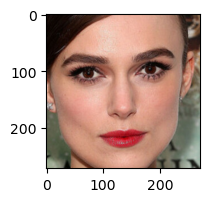

In [51]:
face = embedding_objs[0]['facial_area']
x, y, w, h = face['x'], face['y'], face['w'], face['h']
img_kira = img[y:y + h, x:x + w, :]
plt.figure(figsize=(2, 2))
plt.imshow(img_kira)
plt.show()

In [42]:
#The model coud not verify may be due to different faces because of make-up
result = DeepFace.verify(
  img1_path=img_kira,
  img2_path='db_home/kira.jpeg',
  model_name=MODELS[1]
)
print(result)

{'verified': False, 'distance': 0.9121780677324358, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 271, 'h': 271, 'left_eye': (183, 98), 'right_eye': (69, 105)}, 'img2': {'x': 333, 'y': 190, 'w': 456, 'h': 456, 'left_eye': (628, 354), 'right_eye': (554, 554)}}, 'time': 18.98}


In [43]:
results = DeepFace.find(
  img_path=img_kira,  # face to find
  db_path='db_home',  # path to directory with faces
  model_name=MODELS[0]
)

24-11-25 19:34:28 - Found 1 newly added image(s), 0 removed image(s), 7 replaced image(s).


Finding representations: 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


24-11-25 19:34:33 - There are now 8 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-25 19:34:33 - Searching [[[ 25  14  10]
  [ 20  13   7]
  [ 17  12   6]
  ...
  [130 100  76]
  [135 104  76]
  [138 103  75]]

 [[ 24  13   9]
  [ 26  19  13]
  [ 15  10   4]
  ...
  [133 105  81]
  [137 105  80]
  [139 105  78]]

 [[ 23  14   9]
  [ 22  13   8]
  [ 22  13   8]
  ...
  [133 106  79]
  [135 104  76]
  [139 104  76]]

 ...

 [[156 166 141]
  [157 167 142]
  [158 168 143]
  ...
  [ 78  83  76]
  [105 112 104]
  [126 138 128]]

 [[156 166 142]
  [155 168 142]
  [155 168 142]
  ...
  [ 59  62  55]
  [ 83  88  81]
  [108 115 107]]

 [[154 166 142]
  [155 168 142]
  [155 168 142]
  ...
  [ 40  41  35]
  [ 62  65  58]
  [ 89  94  87]]] in 8 length datastore
24-11-25 19:34:34 - find function duration 5.420830249786377 seconds


In [44]:
# the model could not determine Keir Knightley in databade and decided that it is Nataly Portman maybe because of make-up
results[0]

identity  \
0  db_home/.ipynb_checkpoints/natali-checkpoint.jpeg   
1                                db_home/natali.jpeg   

                                       hash  target_x  target_y  target_w  \
0  9d2695e0d71aa032ad73613fd5feccc2054319f9        71         0       168   
1  9d2695e0d71aa032ad73613fd5feccc2054319f9        71         0       168   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       167         0         0       271       271       0.68  0.648648  
1       167         0         0       271       271       0.68  0.648648

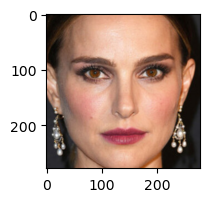

In [74]:
face = embedding_objs[1]['facial_area']
x, y, w, h = face['x'], face['y'], face['w'], face['h']
img_natali = img[y:y + h, x:x + w, :]
plt.figure(figsize=(2, 2))
plt.imshow(img_natali)
plt.show()

In [75]:
result = DeepFace.verify(
  img1_path=img_kira,
  img2_path='db_home/natali.jpeg',
  model_name=MODELS[1]
)
print(result)

{'verified': False, 'distance': 0.6440930437672787, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 271, 'h': 271, 'left_eye': (183, 98), 'right_eye': (69, 105)}, 'img2': {'x': 71, 'y': 0, 'w': 168, 'h': 167, 'left_eye': (182, 46), 'right_eye': (125, 45)}}, 'time': 0.5}


In [76]:
results = DeepFace.find(
  img_path=img_kira,  # face to find
  db_path='db_home',  # path to directory with faces
  model_name=MODELS[0]
)

24-11-25 19:51:32 - Searching [[[ 25  14  10]
  [ 20  13   7]
  [ 17  12   6]
  ...
  [130 100  76]
  [135 104  76]
  [138 103  75]]

 [[ 24  13   9]
  [ 26  19  13]
  [ 15  10   4]
  ...
  [133 105  81]
  [137 105  80]
  [139 105  78]]

 [[ 23  14   9]
  [ 22  13   8]
  [ 22  13   8]
  ...
  [133 106  79]
  [135 104  76]
  [139 104  76]]

 ...

 [[156 166 141]
  [157 167 142]
  [158 168 143]
  ...
  [ 78  83  76]
  [105 112 104]
  [126 138 128]]

 [[156 166 142]
  [155 168 142]
  [155 168 142]
  ...
  [ 59  62  55]
  [ 83  88  81]
  [108 115 107]]

 [[154 166 142]
  [155 168 142]
  [155 168 142]
  ...
  [ 40  41  35]
  [ 62  65  58]
  [ 89  94  87]]] in 9 length datastore
24-11-25 19:51:32 - find function duration 0.26325345039367676 seconds


In [77]:
results[0]

identity  \
0  db_home/.ipynb_checkpoints/natali-checkpoint.jpeg   
1                                db_home/natali.jpeg   

                                       hash  target_x  target_y  target_w  \
0  9d2695e0d71aa032ad73613fd5feccc2054319f9        71         0       168   
1  9d2695e0d71aa032ad73613fd5feccc2054319f9        71         0       168   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       167         0         0       271       271       0.68  0.648648  
1       167         0         0       271       271       0.68  0.648648

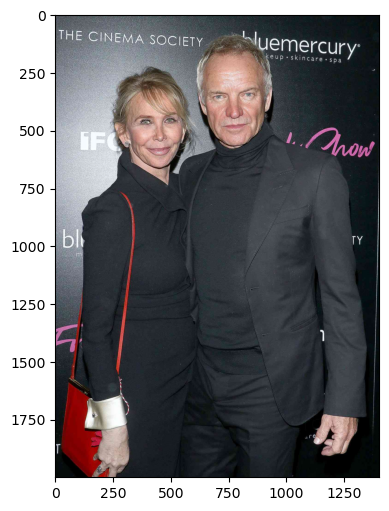

In [63]:
img_path = 'sting_with_wife.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.show()

image loaded: sting_with_wife.jpeg


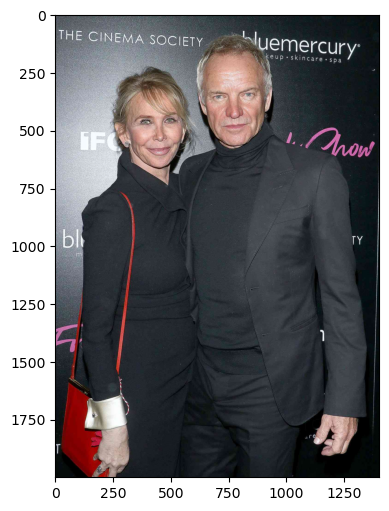

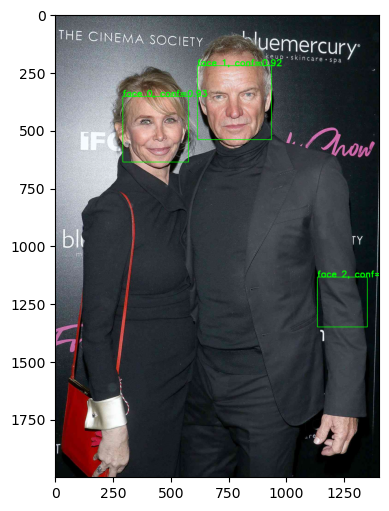

In [64]:
embedding_objs_2 = dfproc(img_path=img_path)

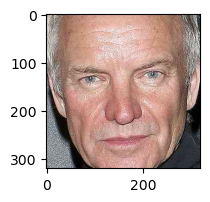

In [66]:
face = embedding_objs_2[1]['facial_area']
x, y, w, h = face['x'], face['y'], face['w'], face['h']
img_sting = img[y:y + h, x:x + w, :]
plt.figure(figsize=(2, 2))
plt.imshow(img_sting)
plt.show()

In [67]:
result = DeepFace.verify(
  img1_path=img_sting,
  img2_path='db_home/sting.jpeg',
  model_name=MODELS[1]
)
print(result)

{'verified': True, 'distance': 0.09506400341371368, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 5, 'y': 7, 'w': 306, 'h': 306, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 79, 'y': 314, 'w': 871, 'h': 871, 'left_eye': None, 'right_eye': None}}, 'time': 0.8}


In [68]:
results = DeepFace.find(
  img_path=img_sting,  # face to find
  db_path='db_home',  # path to directory with faces
  model_name=MODELS[0]
)

24-11-25 19:49:44 - Found 1 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


24-11-25 19:49:45 - There are now 9 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-25 19:49:45 - Searching [[[ 84  90  88]
  [ 53  58  52]
  [238 240 235]
  ...
  [ 33  38  44]
  [ 46  51  57]
  [ 78  83  89]]

 [[ 64  70  68]
  [108 113 107]
  [254 255 251]
  ...
  [ 45  50  56]
  [ 55  60  66]
  [ 61  66  72]]

 [[ 76  82  80]
  [176 181 175]
  [248 250 245]
  ...
  [ 52  57  63]
  [ 64  69  75]
  [ 29  34  40]]

 ...

 [[150 155 161]
  [ 87  92  98]
  [ 91  96 102]
  ...
  [ 39  44  50]
  [ 42  47  53]
  [ 43  48  54]]

 [[111 116 122]
  [157 162 168]
  [209 214 220]
  ...
  [ 46  51  57]
  [ 48  53  59]
  [ 50  55  61]]

 [[ 83  88  94]
  [131 136 142]
  [193 198 204]
  ...
  [ 53  58  64]
  [ 56  61  67]
  [ 57  62  68]]] in 9 length datastore
24-11-25 19:49:45 - find function duration 0.8374760150909424 seconds


In [69]:
results[0]

identity  \
0                                db_home/sting.jpeg   
1  db_home/.ipynb_checkpoints/sting-checkpoint.jpeg   

                                       hash  target_x  target_y  target_w  \
0  09ce98c195126672d5dba0a55a0acbf741f3e515        79       314       871   
1  2ee0f27be6324ca8f764c3940871f8168f7d40de        79       314       871   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       871         5         7       306       306       0.68  0.269983  
1       871         5         7       306       306       0.68  0.269983